### 이항분포 (binomial distribution)

성공확률이  μ  인 베르누이 시도를  N 번 반복하는 경우를 생각해 보자. 가장 운이 좋을 때에는  N 번 모두 성공할 것이고 가장 운이 나쁜 경우에는 한 번도 성공하지 못할 겻이다.  N 번 중 성공한 횟수를 확률변수  X  라고 한다면  X 의 값은 0 부터  N  까지의 정수 중 하나가 될 것이다.

[참고] 데이터 사이언스 스쿨
: https://datascienceschool.net/view-notebook/ddb0f7906b6146e09f5c1e633b4fbe3a/

In [21]:
""" Scipy를 이용한 이항 분포 시뮬레이션
    
    scipy 패키지의  binom 클래스가 이용
"""
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

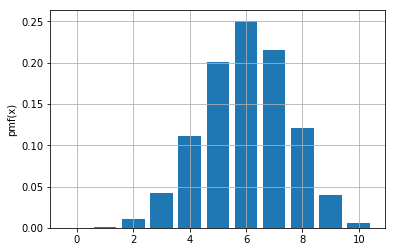

In [15]:
# 10번 시도시 성공할 확률 중에서 60% 성공 할 확률이 제일 높게 지정 ( 시뮬레이션 아님 )

N = 10
theta = 0.6  # 베르누이 분포의 모수(parameter)인 확률변수 값
rv = sp.stats.binom(N, theta)

xx = np.arange(N+1)  # 0~10 까지의 값
plt.bar(xx, rv.pmf(xx))
plt.ylabel("pmf(x)")
plt.grid(True)

[ 6  5  6  6  6  5  6  4  3  6  5  6  6  4  8  8  9  5  5  4  3  5  6  5
  8  5  8  4  6  6  7  5  6  6  9  6  6  6  4  5  7  6  5  8  5  5  7  8
  7  7  6  6  2  8  7  8  5  7  6  7  8  8  5  8  7  7  5  8  4  8  3  6
  3  6  5  9  7  8  7  8  7  6  8  5  6  7  6  8  6  4  7  5  8  5  7  7
  6  9  5 10]


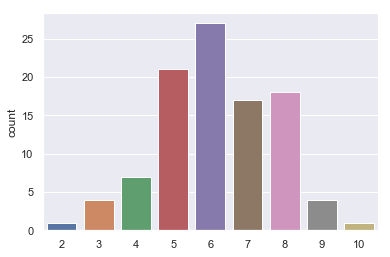

In [20]:
""" 시뮬레이션 (rvs 메소드 이용 )"""
np.random.seed(0)
x = rv.rvs(100) # 10번을 던졌을 때 성공할 횟수를 100번 샘플링 하겠다
print(x)

# 10번을 던졌을 때의 나온 횟수를 다시 정리하자면
# sns.set()    # 추후에 전체적인 스타일 변경하고자
# sns.set_style('darkgrid')
sns.countplot(x)

    sample        type         %
0        0      theory  0.000105
1        0  simulation  0.000000
2        1      theory  0.001573
3        1  simulation  0.000000
4        2      theory  0.010617
5        2  simulation  0.010000
6        3      theory  0.042467
7        3  simulation  0.040000
8        4      theory  0.111477
9        4  simulation  0.070000
10       5      theory  0.200658
11       5  simulation  0.210000
12       6      theory  0.250823
13       6  simulation  0.270000
14       7      theory  0.214991
15       7  simulation  0.170000
16       8      theory  0.120932
17       8  simulation  0.180000
18       9      theory  0.040311
19       9  simulation  0.040000
20      10      theory  0.006047
21      10  simulation  0.010000


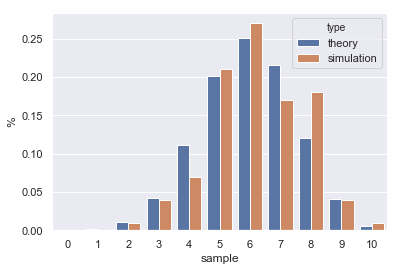

In [24]:
""" 이론과 시뮬레이션 비교 """
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({'theory': rv.pmf(xx), 'simulation': y})
df2 = df.stack().reset_index()
df2.columns = ['sample','type','%']
print(df2)

# [분석]
# 7번인 경우 이론보다 시뮬레이션 값이 더  적게 나오고 8번인 경우는 시뮬레이션에서 조금 더 많이 나왔다
# 표의 값을 먼저 비교한 후에 시각화로 표시

sns.barplot(x='sample', y='%', hue='type', data=df2)